<a href="https://colab.research.google.com/github/elio-li/CSCI4964/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## Task 1 (10 points)

Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.

## Task 2 (20 points)

Pick a publicly available dataset that you will use to solve this problem. You must provide a link to the dataset and perform necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data. This task may include data visualization (Check this link : <https://www.geeksforgeeks.org/top-8-python-libraries-for-data-visualization/>).

Data Set Comes From: [Graduate Admission 2 from Kaggle.com](https://www.kaggle.com/mohansacharya/graduate-admissions) (used ver1.1 for this one)

- In this part I have:
  - renamed all the attribute to a more code-like name such as `GRE Score` into `gre` etc.
  - removed the unnecessary columns such as `Serial No.`
  - split the data set into `x` & `y` for eaiser processing
  - plot the diagrams that shows the relation of each attributes
  - scale values that can be fitted into the model

- Discovery:
  - there're no missing data in this dataset
  - there're no `NULL` data in the dataset as well
  - all data type are numerical

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. load into dataframe
df = pd.read_csv("admission.csv")

In [3]:
# 2. renaming the columns
df = df.rename(columns={'Serial No.': 'id', 'GRE Score': 'gre', 'TOEFL Score': 'toefl',
                        'University Rating': 'rating', 'SOP': 'sop', 'LOR ': 'lor',
                        'CGPA': 'cgpa', 'Research': 'research', 'Chance of Admit ': 'admit'})
df.pop('id')
df.head(5)

,gre,toefl,rating,sop,lor,cgpa,research,admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# 3. drop unecessary columns
y = df.admit.values
x = df.drop(['admit'], axis = 1)

In [5]:
# 4. feature scaling
# https://en.wikipedia.org/wiki/Feature_scaling
x_prime = (x - np.min(x)) / (np.max(x) - np.min(x))
print(x_prime)
x_array = x_prime.to_numpy()
print(x_array)

      gre     toefl  rating    sop    lor      cgpa  research
0    0.94  0.928571    0.75  0.875  0.875  0.913462       1.0
1    0.68  0.535714    0.75  0.750  0.875  0.663462       1.0
2    0.52  0.428571    0.50  0.500  0.625  0.384615       1.0
3    0.64  0.642857    0.50  0.625  0.375  0.599359       1.0
4    0.48  0.392857    0.25  0.250  0.500  0.451923       0.0
..    ...       ...     ...    ...    ...       ...       ...
495  0.84  0.571429    1.00  0.875  0.750  0.711538       1.0
496  0.94  0.892857    1.00  1.000  1.000  0.983974       1.0
497  0.80  1.000000    1.00  0.875  1.000  0.884615       1.0
498  0.44  0.392857    0.75  0.750  1.000  0.522436       0.0
499  0.74  0.750000    0.75  0.875  0.875  0.717949       0.0

[500 rows x 7 columns]
[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8   

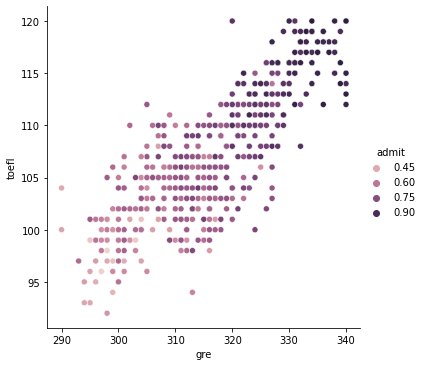

In [15]:
import seaborn as sns
# 5. plot
sns.relplot(x = "gre", y = "toefl", hue = "admit", data = df);

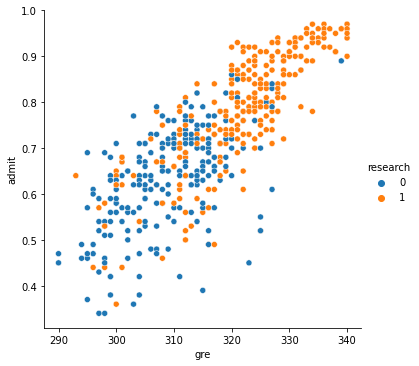

In [20]:
sns.relplot(x = "gre", y = "admit", hue = "research", data = df);

- No surprising, the higher the students' TOEFL and GRE scores are, the higher the chance of getting admitted, also students with research will also very likly get admitted.

## Task 3 (35 points)

Implement, Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants of gradient descent in their original form. (Refer to the research paper discussed in class).

In [21]:
"""
Operation Functions(exp, log, dot, etc.)
  - just to get rid of 'np.xxx'
"""

def dot(x, y):
  return np.dot(x, y)

def log(x):
  return np.log(x)

def exp(x):
  return np.exp(x)

def sigmoid(a):
  return 1 / (1 + exp(-a))

In [22]:
"""
Utility Functions
"""

def predict(w, x, b):
  z = dot(w.T, x) + b
  return sigmoid(z)

def loss(y, w, x, b):
  y_hat = predict(w, x, b)
  return - (y * log(y_hat) + (1 - y) * log(1 - y_hat))

def cost(y, w, x, b):
  n = x.shape[1]
  l = loss(y, w, x, b)
  c = 1/n * (np.sum(l))
  return c

def gradient(y, w, x, b):
  n = x.shape[1]
  A = predict(w, x, b)

  dw = 1/n * dot(x, (A-y).T)
  db = 1/n * np.sum(A - y)
  return dw, db

def activation(y, n):
  prediction = np.zeros(n)
  for i in range(y.shape[1]):
    if y[0, i] > 0.5:
      prediction[i] = 1
    else:
      prediction[i] = 0
  return prediction
  

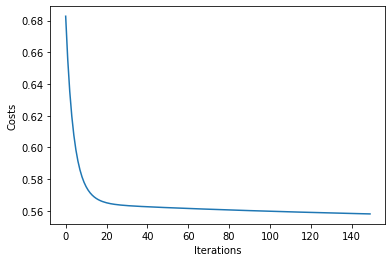

In [25]:
"""
Batch Gradient Descents
"""

def batch(x, y, iter, learnrate):
  # number of examples & features
  m, n = x.shape
  w = np.full((m, 1), 0.01)
  b = 0

  costs = []
  for i in range(iter):
    # get cost & derivatives
    l = cost(y, w, x, b)
    dw, db = gradient(y, w, x, b)
    costs.append(l)

    # update values
    w = w - learnrate * dw
    b = b - learnrate * db

  y_hat = predict(w, x, b)
  prediction = activation(y_hat, n)

  plt.plot(costs)
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
  plt.show()

batch(x_array.T, y, 150, 0.15)

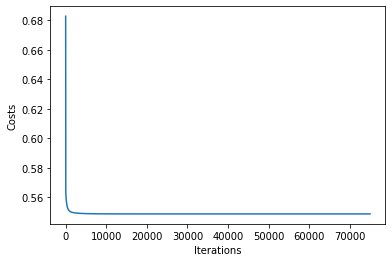

In [ ]:
"""
Stochastic Gradient Descents
"""
import sklearn

def stochastic(x_train, y_train, x_test, y_test, iter, learnrate):
  # number of examples & features 
  m, n = x_train.shape
  w = np.full((m,1), 0.01)
  b = 0

  costs = []
  for i in range(iter):
    shuf_x, shuf_y = sklearn.utils.shuffle(x_train.T, y_train)
    for j in range(n):
      # get cost & derivatives
      l = cost(shuf_y, w, shuf_x.T, b)
      dw, db = gradient(shuf_y, w, shuf_x.T, b)
      costs.append(l)

      # update values
      w = w - learnrate * dw
      b = b - learnrate * db

  y_hat = predict(w, x_test, b)
  prediction = activation(y_hat, n)

  plt.plot(costs)
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
  plt.show()

stochastic(x_train.T, y_train, x_test.T, y_test, 150, 0.15)

## Task 4 (35 points)

Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why or why not should we use optimization algorithms for the task at hand.